<h1 style="color: black; font-weight: bold; text-align: center"> Group_99 </h1>
<h2  style="color: black; font-weight: bold; text-align: center"> Members: </h2>
<div style="color: black;list-style: none; font-weight: bold; text-align: center">

<p> Paweł Piwowarski </p> <br>
      <p> Teodora Taran</p>  <br>
      <p> Adam Rydziński </p>  <br>
    <p> Keira Ziebol </p>  <br>


<h3> The following notebook contains the code for the visualiastion of our ontology concering the combined data of artworks and artists from RijksMuseum and Moma. </h3>
<img style="height: 200px"src="https://itemsmagazine.com/media/uploads/images/Rijksmuseum_aug2012_logo_HR.jpg"> </img>
<img style="height: 200px"src="https://bpando.org/wp-content/uploads/02_MoMA_Brand_Identity_Design_Logotype_Order_New_York_USA_BPO.jpg"> </img>

<h3> This Notbook was created to present the knowledge gathered during the course Knowledge and Data in the year 2022.
The course was a part of the curriculum for 2nd year Artificial Intelligence Bachelor students at Vrije Universiteit Amsterdam <h3> 
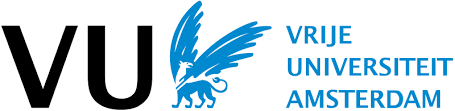 </img>

</div>







In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import folium
from IPython.display import Image
import random
import pandas as pd

ModuleNotFoundError: No module named 'SPARQLWrapper'

<h1> The first visualization that we would like to perform is to compare the sizes of artwork collection of  MoMa and Rijksmuseum </h1>
<p> This short visualisation will help us better understand the scope of the ontology and the data which is modeled inside </p>

In [ ]:
query = """ 

prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#> 
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> 


SELECT  ?museum  (count(?x) as  ?number_of_artworks) WHERE { 
?x art:locatedIn ?museum .
}

GROUP BY(?museum)

"""

sparql = SPARQLWrapper("http://localhost:7200/repositories/group_99")


dict = {'RijksMuseum': 0, 'Moma': 0}
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    dict[result["museum"]["value"].split('#')[-1]] = int(result["number_of_artworks"]["value"])

print(dict)

df = pd.DataFrame.from_dict(dict, orient='index', columns=['Number of Artworks'])


df.plot(kind='bar', title='Number of Artworks per Museums Database', figsize=(20, 10), fontsize=20, color=['green'])




<h1> 1) Artsist Data </h1>

<h3> 1.1) Nationality Data</h3>
<p> We wanted to show the Nationalities of artists of Artists in both RijksMuseum and Moma</p>
<p> Executing this query might again take a while if it takes more than 1 minute we advise to restart the GraphDB instance </p>

In [ ]:
query = """ prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#> 
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
prefix dbr: <http://dbpedia.org/resource/>

SELECT ?nationality (count(?nationality) as ?number_of_nationalities) WHERE { 

?artist art:hasNationality ?nationality .
?artist art:made ?artwork .
?artwork art:locatedIn art:RijksMuseum


}
GROUP BY ?nationality 
ORDER BY DESC(?number_of_nationalities)

LIMIT 30  """
dic    = {}

sparql = SPARQLWrapper("http://localhost:7200/repositories/group_99")
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    nationality = result["nationality"]["value"].split('/')[-1]
    number = int(result["number_of_nationalities"]["value"])
    dic[nationality] = [ number]

rijks_df = pd.DataFrame.from_dict(dic, orient='index', columns=[ 'Rijks_number_of_artists'])

In [ ]:
moma_query = """ prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#> 
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
prefix dbr: <http://dbpedia.org/resource/>

SELECT ?nationality (count(?nationality) as ?number_of_nationalities) WHERE { 

?artist art:hasNationality ?nationality .
?artist art:made ?artwork .
?artwork art:locatedIn art:Moma


}
GROUP BY ?nationality 
ORDER BY DESC(?number_of_nationalities)

LIMIT 30  """
dic    = {}

sparql = SPARQLWrapper("http://localhost:7200/repositories/group_99")
sparql.setQuery(moma_query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    nationality = result["nationality"]["value"].split('/')[-1]
    number = int(result["number_of_nationalities"]["value"])
    dic[nationality] = [number]

moma_df = pd.DataFrame.from_dict(dic, orient='index', columns=[ 'Moma_number_of_artists'])



In [ ]:
# merge the two dataframes on index and delete the rows with NaN values
df = pd.merge(rijks_df, moma_df, left_index=True, right_index=True)[pd.merge(rijks_df, moma_df, left_index=True, right_index=True).index != 'nan'].sort_values(by=['Moma_number_of_artists'], ascending=False)





# display the dataframe using a bar graph displaying which museume contrubute how many artists


df.plot.bar(title='Number of Artists by Nationality Represented in the two Museums', figsize=(20, 10), fontsize=20, stacked=True)

<h3> 1.2) Period data</h3>
<p>Now let's try to answer the question: Which periods are the best represented in the Museums? </p>
<p> Let's take all of the data from the museums and group it by the date of birth of the Arists </p>

In [ ]:
date_info_query = """
prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#> 
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

SELECT * WHERE { 
{
select distinct ?date (count(?date) as ?rijks_number_of_specific_dates) WHERE { 

?artist rdf:type art:Artist .
?artist art:bornAt ?date .
?artist art:made ?work .
?work art:locatedIn art:RijksMuseum

}

group by (?date)

}
 {
select distinct ?date (count(?date) as ?moma_number_of_specific_dates) WHERE { 

?artist rdf:type art:Artist .
?artist art:bornAt ?date .
?artist art:made ?work .
?work art:locatedIn art:Moma

}

group by (?date)


}
}

ORDER BY DESC(?date) """

dic    = {}

sparql = SPARQLWrapper("http://localhost:7200/repositories/group_99")
sparql.setQuery(date_info_query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    date = result["date"]["value"].split('/')[-1]
    rijks_number = int(result["rijks_number_of_specific_dates"]["value"])
    moma_number = int(result["moma_number_of_specific_dates"]["value"])
    dic[date] = [rijks_number, moma_number]

date_df = pd.DataFrame.from_dict(dic, orient='index', columns=[ 'Rijks_number_of_specific_dates', 'Moma_number_of_specific_dates'])

date_df.plot.bar(title='Number of Artists by Date Represented in the two Museums', figsize=(20, 20), fontsize=15, stacked=True)

<h2> 1.3) Gender Data (Only for MoMa)</h2>




In [ ]:
gender_query = """ prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix xml: <http://www.w3.org/XML/1998/namespace>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr: <http://dbpedia.org/resource/>

SELECT * WHERE {
{
select (count(?artist) as ?Males) {
    ?artist art:hasGender "Male"
}
}


{
select (count(?artist) as ?Females) {
    ?artist art:hasGender "Female"
}
}
    
}

"""

sparql_gender = SPARQLWrapper("http://localhost:7200/repositories/group_99")

sparql_gender.setQuery(gender_query) 

sparql_gender.setReturnFormat(JSON)
results = sparql_gender.query().convert()
gender_dicionary = {}
for result in results["results"]["bindings"]:
    gender_dicionary["Number_of_Males_In_Moma"] = [int(result["Males"]["value"])]
    gender_dicionary["Number_of_Females_In_Moma"] =  [int(result["Females"]["value"])]


gender_df = pd.DataFrame.from_dict(gender_dicionary, orient='index', columns=[ 'Value'])

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

gender_df.plot.pie(subplots=True, figsize=(10, 10), fontsize=20, autopct='%1.1f%%', shadow=True, startangle=90)

<h2> 2) Artwork Data </h2>

<h3>2.1) Dates  <h3>
<p> Our goal was to make this part as interactive as possible </p>
<p> That's why we've added the possibility for user input! </p>
<p> In this part you are asked to change the variable date to any date you please and see the results! </p>

In [ ]:
# change this variable to get a different image from the dataset based on the Value!
# change the number of artworks to get a different image from the dataset based on the Value on each iteration!

input_date = 1812
number_of_artworks = 20
# get the image from the dataset based on the date

url_query = """ 
prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#> 
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
prefix dbr: <http://dbpedia.org/resource/>


select distinct ?museum ?name ?url ?died_at ?city ?born_at ?title WHERE { 

?artist rdf:type art:Artist .
?artist art:hasName ?name  .
?artist art:made ?artwork .
?artist art:bornIn ?city .
?artist art:diedAt ?died_at .
?artwork art:hasUrl ?url .
?artwork art:hasTitle ?title .
?artwork art:locatedIn ?museum
    filter(?url != "NaN") 
    filter(?city != dbr:None && ?city != dbr:nan)
?artist art:bornAt ?born_at
  FILTER (?born_at=""" +  '"' + str(input_date)+ '"'+ """^^xsd:nonNegativeInteger)



} 
LIMIT """ + str(number_of_artworks) + """
"""

dic_list = []

sparql_url = SPARQLWrapper("http://localhost:7200/repositories/group_99")
sparql_url.setQuery(url_query)
sparql_url.setReturnFormat(JSON)
results = sparql_url.query().convert()
if (len(results["results"]["bindings"]) == 0):
    print("No results found, please enter a different date")
else: 
  for result in results["results"]["bindings"]:

        url = result["url"]["value"]
        date = result["born_at"]["value"]
        artist = result["name"]["value"].split('/')[-1]
        date_of_death = result["died_at"]["value"].split('/')[-1]
        city_of_birth = result["city"]["value"].split('/')[-1]
        art_work_title = result["title"]["value"].split('/')[-1]
        museum = result["museum"]["value"].split('#')[-1]
        dic_list.append({"name": artist, "born_at": date, "died_at": date_of_death, "born_in": city_of_birth, "title": art_work_title, "museum": museum, "url": url})


  #pick random object from the list
  random_arist = random.choice(dic_list)

  print(random_arist["name"] + " born in " + random_arist["born_at"] + " in the city of " + random_arist["born_in"] + " and died in " + random_arist["died_at"] )
  print("made " + random_arist['title'] + ' currently in the collction of ' + random_arist["museum"])



Image(url=random_arist["url"], width=500, height=500)





<h3>2.2) Names  <h3>
<p> Type in the name of the artist an display all of the works created by them. </p>
<p> Let's start with Rembrandt </p>
<p> You can try with other names as well! </p>
<p> We recommend Vermeer and Goya </p>

In [ ]:
name = "Vermeer"

artist_query = """
prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix xml: <http://www.w3.org/XML/1998/namespace>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbr: <http://dbpedia.org/resource/>

select distinct ?name ?url ?died_at ?city ?born_at ?title WHERE {
    
?artist rdf:type art:Artist .
?artist art:hasName ?name  .
?artist art:made ?artwork .
?artist art:bornIn ?city .
?artist art:diedAt ?died_at .
?artwork art:hasUrl ?url .
?artwork art:hasTitle ?title .
?artist art:bornAt ?born_at

    FILTER regex(?name, """ + '"' + "" + name + """")
    filter(?url != "NaN")
    filter(?city != dbr:None && ?city != dbr:nan)
}
"""

url_list = []
title = []



sparql_artist_url = SPARQLWrapper("http://localhost:7200/repositories/group_99")
sparql_artist_url.setQuery(artist_query)
sparql_artist_url.setReturnFormat(JSON)
results = sparql_artist_url.query().convert()
if (len(results["results"]["bindings"]) == 0):
    print("No results found, please enter artists name")
else:

    for result in results["results"]["bindings"]:
    
            url = result["url"]["value"]
            url_list.append(url)
            date = result["born_at"]["value"]
            artist = result["name"]["value"].split('/')[-1]
            date_of_death = result["died_at"]["value"].split('/')[-1]
            city_of_birth = result["city"]["value"].split('/')[-1]
            art_work_title = result["title"]["value"].split('/')[-1]
            title.append(art_work_title)
            dic_list.append({"name": artist, "born_at": date, "died_at": date_of_death, "born_in": city_of_birth, "title": art_work_title, "url": url})
    
    print(str(artist) + " born in " + str(date) + " in the city of " + city_of_birth + " and died in " + str(date_of_death))
    print("made the following works")



for index, url in enumerate(url_list):
    print(str(index + 1) + ") " + title[index])
    display(Image(url=url, width=500, height=500))

        


<h3>3) Visualisation Guru  <h3>
<p> Our idea was to create a truly immersive map! </p>
<p> This visualisation will show the 100 birth cities that are the most common in our knowledge graph on a map! </p>
<p> The map contais only artits from RijksMuseum since only they have a birth city </p>
<p> Please be patient as collecting the data takes around 60 seconds depending on your machine. </p>

In [ ]:


query = """ prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#> 
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
prefix dbr: <http://dbpedia.org/resource/>
prefix geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>

select  ?city (count(?city) as ?number_of_cites) WHERE { 
?artist art:bornIn ?city .
    FILTER(?city != dbr:None && ?city != dbr:none && ?city != dbr:nan)
 

}

GROUP BY(?city)

ORDER BY DESC(?number_of_cites)


LIMIT 100
    
"""
dic    = {}

sparql = SPARQLWrapper("http://localhost:7200/repositories/group_99")
sparql_dbpedia = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    city = result["city"]["value"].split('/')[-1].split('_')[0]
    
    number = int(result["number_of_cites"]["value"])

    query_2 = """ 

    prefix dbr: <http://dbpedia.org/resource/>
    prefix geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>

    select  ?lat ?long WHERE {dbr:""" + city + """ geo:lat ?lat . 
        dbr:""" + city + """ geo:long ?long .}"""
    try:
        sparql_dbpedia.setQuery(query_2)
        sparql_dbpedia.setReturnFormat(JSON)
        results_2 = sparql_dbpedia.query().convert()
        for result_2 in results_2["results"]["bindings"]:
            lat = result_2["lat"]["value"]
            long = result_2["long"]["value"]
            dic[city] = [lat, long, number]

    except:
        pass



df_rijks = pd.DataFrame.from_dict(dic, orient='index', columns=['lat', 'long', 'number_of_artists_rijks'])



<p> First let's show the data on a simple graph </p>

In [ ]:

df_rijks.plot.bar(title='Number of Artists per City', figsize=(20, 10), fontsize=20, color=['green'])

<h3> Now let's try displaying the information on a map! </h3>
<p> Since the data is not really well represented we wanted to present a more interactive view of the matter</p>
<p> We've created a simple map  with the data of the cities combined with the number of artists that were born in that city </p>
<p> Addidtionally we gathered data about the latidude and longitude of the cities from Dpedia </p>

<h3> A  simple guide to our map</h3>
<ol> 
<li> Hover over a city to see it's name</li>
<li> Click on a city to see the number of artists born in this specific city </li>
<li> The color of the marker indicates the number of artists born in that city with: </li>
<ul>
<li style=" color:red"> Red being the highest number of artists</li>
<li style = "color: orange"> Orange being the second highest number of artists with sizes smaller that 50 but bigger than 10 </li>
<li style = "color: green" > Lastly green for the smaller number of artists.</li>
</ul>
<li> Additionaly on clicking over a city one gets the possiblity to explore it using Dpbedia by just clicking Explore City! (This works correctly when the notebook is opened inside a browser and not an IDE such as VsCode f.e) </li>
<li> If you want to change the map's layout you can always do so by clicking on the icon on the upper right corner. </li>

In [ ]:
def calculate_color(number):
    if number < 10:
        return 'green'
    elif number < 50:
        return 'orange'
    else:
        return 'red'



map = folium.Map(location=[51.507359,-0.136439], zoom_start=5, width=1000, height=500, control_scale=True, tiles='Stamen Watercolor')
folium.raster_layers.TileLayer('Open Street Map').add_to(map)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map)
folium.LayerControl().add_to(map)
for (index,row) in df_rijks.iterrows():
    folium.Marker(location=[row['lat'], row['long']], icon=folium.Icon(prefix='fa', icon="picture-o", color=(calculate_color(row['number_of_artists_rijks']))),radius=row['number_of_artists_rijks']/100,tooltip = index ,popup= "<a  target=_blank href=https://dbpedia.org/resource/" + index +">Explore city! </a>" + "Number of artists " + str(row['number_of_artists_rijks']), color='red', fill_color='red').add_to(map)

map